<a href="https://colab.research.google.com/github/Sameersah/data-science-methodology/blob/main/SEMMA/CRISP_DM_SEMMA_AND_KDD_assignments_PART_2_SEMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEMMA

SEMMA, developed by the SAS Institute, stands for Sample, Explore, Modify, Model, and Assess. It’s a process often used in data mining and predictive modeling projects, providing a systematic approach for analyzing large datasets to build reliable predictive models.

### Phases of SEMMA:
1. **Sample**: Select a representative sample of data from a larger dataset to make the analysis efficient and manageable.
2. **Explore**: Conduct exploratory data analysis (EDA) to understand patterns, spot anomalies, and gain insights into the data's structure and relationships.
3. **Modify**: Prepare and preprocess the data for modeling. This includes cleaning, transforming variables, creating new features, and selecting relevant variables.
4. **Model**: Apply data mining or machine learning algorithms to the prepared data to build predictive or descriptive models.
5. **Assess**: Evaluate the model's performance to ensure it meets accuracy and reliability standards. This phase may involve testing with different metrics and validating the model on new data.

### When to Use SEMMA:
SEMMA is well-suited for projects focused on building robust predictive models, such as in finance, marketing, or healthcare. Its structured approach is ideal when you have large volumes of data and a specific outcome or prediction in mind. SEMMA is particularly effective for refining and validating models to ensure they deliver reliable, actionable insights.

## Sample:
We begin by loading a sample of the data to get a preliminary understanding of its contents and structure. By viewing the initial rows, we can verify that the data loaded correctly and start identifying key columns, data types, and potential variables of interest.

In [1]:
## Connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CMPE-255/GRAPE_QUALITY.csv')

# Display the first few rows to examine the dataset
data.head()


,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
0,1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,2023-09-04,8.4,55.9,223.3
1,2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,2023-09-16,8.8,36.9,312.1
2,3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,2023-08-25,11.1,64.9,698.7
3,4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,2023-09-13,8.0,54.5,660.1
4,5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,2023-08-11,11.2,36.3,410.4


## Explore Step:
In the exploration phase, we investigate the data’s characteristics, identify patterns, and detect any irregularities. First, we check the dataset for data types, missing values, and basic statistical summaries. We then visualize the distribution of key numerical columns to observe spread and shape, which helps in spotting potential outliers or unusual patterns.

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              1000 non-null   int64  
 1   variety                1000 non-null   object 
 2   region                 1000 non-null   object 
 3   quality_score          1000 non-null   float64
 4   quality_category       1000 non-null   object 
 5   sugar_content_brix     1000 non-null   float64
 6   acidity_ph             1000 non-null   float64
 7   cluster_weight_g       1000 non-null   float64
 8   berry_size_mm          1000 non-null   float64
 9   harvest_date           1000 non-null   object 
 10  sun_exposure_hours     1000 non-null   float64
 11  soil_moisture_percent  1000 non-null   float64
 12  rainfall_mm            1000 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.7+ KB


In [5]:
# Get a summary of numerical columns
data.describe()



,sample_id,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,2.49436,20.140150,3.503410,197.112470,17.411620,8.992600,49.731900,489.42300
std,288.819436,0.52896,5.843944,0.406907,85.946831,4.302279,1.736462,11.591189,170.95025
min,1.000000,1.10000,10.060000,2.800000,50.200000,10.000000,6.000000,30.100000,200.10000
25%,250.750000,2.10000,14.817500,3.167500,122.572500,13.677500,7.500000,39.600000,341.60000
50%,500.500000,2.50000,20.375000,3.500000,195.285000,17.415000,8.900000,49.400000,490.40000
75%,750.250000,2.87000,25.212500,3.860000,271.265000,21.097500,10.400000,60.300000,628.65000
max,1000.000000,3.97000,29.990000,4.200000,349.870000,24.970000,12.000000,70.000000,799.30000


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)



Missing values per column:
 sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64


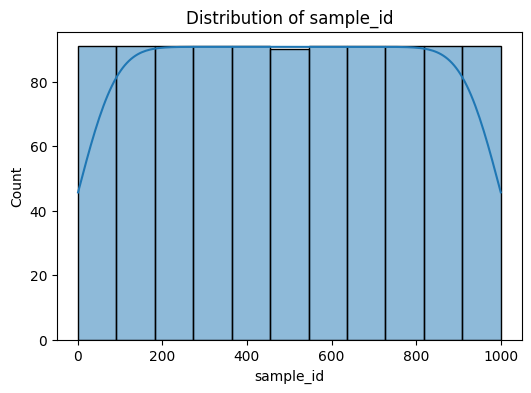

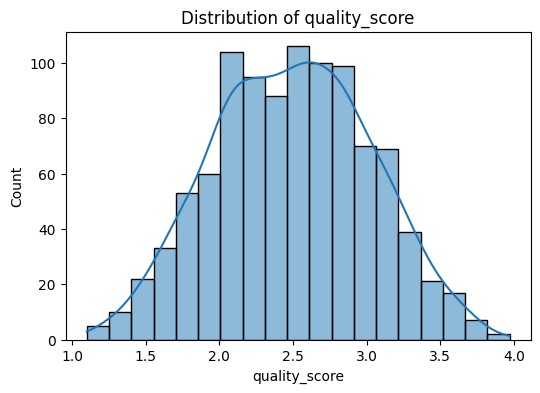

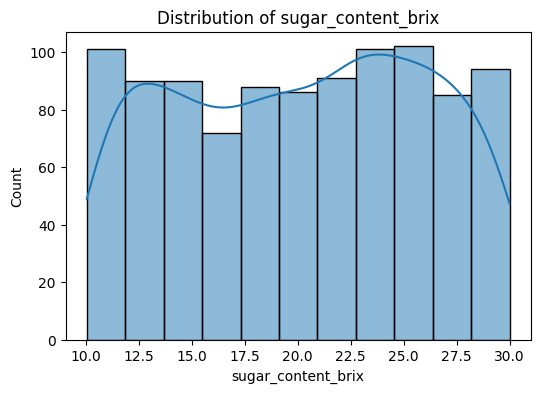

In [7]:
# Visualize distributions of a few key columns (replace 'column1', 'column2' with actual column names)
import matplotlib.pyplot as plt
import seaborn as sns

# Example of distribution plot
for column in data.select_dtypes(include=['float64', 'int64']).columns[:3]:  # Modify as needed
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

## Modify Step:

 In the modification phase, we clean and transform the data to improve model performance. We address missing values by filling them with the median value, encode categorical variables to numerical form, and scale numerical features to standardize their ranges. These steps ensure that all data is ready for modeling and that differences in scale won’t negatively impact the analysis.

In [10]:
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values in numeric columns with the median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# For non-numeric columns, fill missing values with the mode (most frequent value)
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify there are no missing values left
print("Missing values after filling:\n", data.isnull().sum())

# 2. Encode categorical variables (if there are any; update column names if needed)
# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# 3. Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the first few rows of the modified data
data.head()


<ipython-input-10-7f0d3038c3db>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Missing values after filling:
 sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64


,sample_id,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm,variety_Chardonnay,...,harvest_date_2023-09-21,harvest_date_2023-09-22,harvest_date_2023-09-23,harvest_date_2023-09-24,harvest_date_2023-09-25,harvest_date_2023-09-26,harvest_date_2023-09-27,harvest_date_2023-09-28,harvest_date_2023-09-29,harvest_date_2023-09-30
0,-1.730320,-0.726996,-1.102573,-0.819786,0.636730,0.271708,-0.341439,0.532403,-1.557507,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.726856,0.634845,0.119816,-0.868962,1.069656,1.085638,-0.110971,-1.107593,-1.037797,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.723391,1.939943,1.253180,1.393127,-0.837826,0.927503,1.214224,1.309244,1.224811,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.719927,-0.405450,0.770388,-0.868962,0.469682,-1.186388,-0.571908,0.411561,0.998901,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.716463,0.767246,1.025480,-0.795198,0.284126,-1.202667,1.271841,-1.159382,-0.462489,False,...,False,False,False,False,False,False,False,False,False,False


## Model Step:

For the modeling phase, we split the dataset into training and testing sets to validate our model’s performance. We selected a simple Logistic Regression model, trained it on the training data, and then used it to predict the test set. The accuracy, confusion matrix, and classification report provide insights into how well the model performs, indicating its ability to classify the grape quality accurately.

In [16]:
# Display column names to find the correct target column name
data.columns

Index(['sample_id', 'quality_score', 'sugar_content_brix', 'acidity_ph',
       'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours',
       'soil_moisture_percent', 'rainfall_mm', 'variety_Chardonnay',
       'variety_Merlot', 'variety_Pinot Noir', 'variety_Riesling',
       'variety_Sauvignon Blanc', 'variety_Syrah', 'variety_Zinfandel',
       'region_Bordeaux', 'region_Loire Valley', 'region_Mendoza',
       'region_Napa Valley', 'region_Rioja', 'region_Sonoma', 'region_Tuscany',
       'quality_category_Low', 'quality_category_Medium',
       'quality_category_Premium', 'harvest_date_2023-08-02',
       'harvest_date_2023-08-03', 'harvest_date_2023-08-04',
       'harvest_date_2023-08-05', 'harvest_date_2023-08-06',
       'harvest_date_2023-08-07', 'harvest_date_2023-08-08',
       'harvest_date_2023-08-09', 'harvest_date_2023-08-10',
       'harvest_date_2023-08-11', 'harvest_date_2023-08-12',
       'harvest_date_2023-08-13', 'harvest_date_2023-08-14',
       'harvest_date

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
# Replace 'quality_column' with the actual column name for quality in the dataset
X = data.drop(columns=['quality_category_Low'])  # replace with your target column
y = data['quality_category_Low']  # replace with your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 1.0
Confusion Matrix:
 [[195   0]
 [  0   5]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       195
        True       1.00      1.00      1.00         5

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Assess Step:

 We evaluate the model’s effectiveness by examining both quantitative and visual metrics. The confusion matrix shows the breakdown of true positive, true negative, false positive, and false negative predictions, helping us understand where the model performs well and where it struggles. For binary classification, the ROC curve offers further insights by plotting the true positive rate against the false positive rate, with the area under the curve (AUC) serving as an overall indicator of performance.

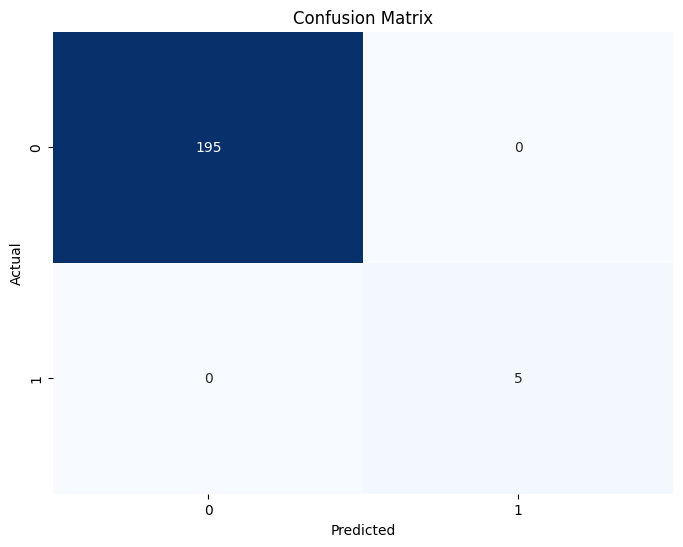

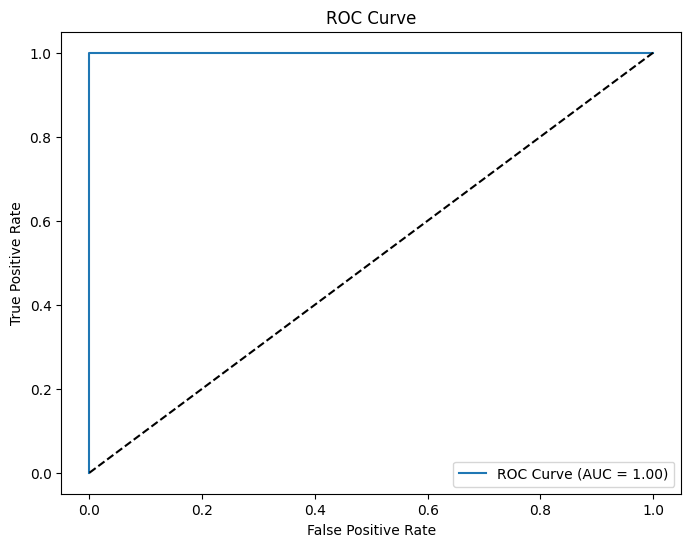

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (if it's a binary classification)
if len(y.unique()) == 2:
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Additional metrics can be added as needed, depending on the type of problem
